[*********************100%***********************]  1 of 1 completed

Loaded model from xgboost_TSLA.joblib


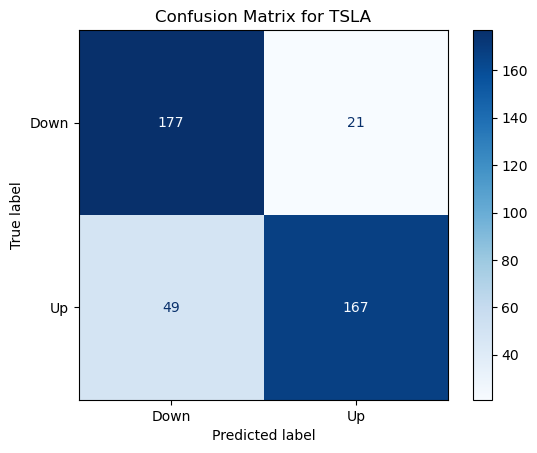

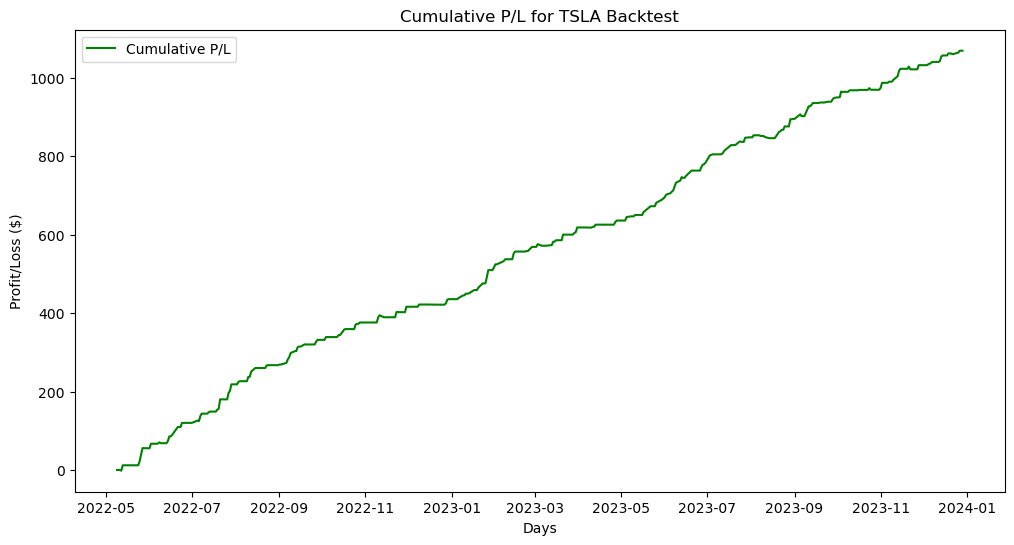

Backtesting Metrics: {'accuracy': 0.8309178743961353, 'precision': 0.8882978723404256, 'recall': 0.7731481481481481, 'f1_score': 0.8267326732673267, 'roc_auc': 0.9118967452300786, 'total_pnl': 1069.023338317871, 'avg_daily_pnl': 2.582181976613215, 'max_drawdown': -7.3300018310546875}


In [5]:
import sys
import os

# Get the absolute path to the `src` directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Add the `src` directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from data_processing import fetch_stock_data, calculate_technical_indicators

# Backtesting function
def backtest_xgboost(ticker, start_date='2022-01-01', end_date='2024-01-01', feature_subset=None):
    """
    Backtest a saved XGBoost model on unseen data.

    Args:
    ticker: str, The stock ticker symbol.
    start_date: str, Start date for backtesting data.
    end_date: str, End date for backtesting data.
    feature_subset: list of str, Features used during model training.

    Returns:
    metrics: dict, Performance metrics for the backtested data.
    """
    # Load the saved model
    model_filename = f"xgboost_{ticker}.joblib"
    model = load(model_filename)
    print(f"Loaded model from {model_filename}")
    
    # Fetch and preprocess backtesting data
    data = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    data = calculate_technical_indicators(data)
    data['Price_Change'] = data['Close'].diff()
    data['Target'] = (data['Price_Change'] > 0).astype(int)
    data = data.dropna()  # Remove NaN values

    X_test = data[feature_subset] if feature_subset else data.drop(columns=['Price_Change', 'Target'])
    y_test = data['Target']
    close_prices = data['Close']
    
    # Predict on the backtesting data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Down", "Up"]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {ticker}")
    plt.show()

    positions = y_pred  # 1 for "up" (buy), 0 for "down" (sell)
    price_changes = close_prices.diff().fillna(0)  # Daily price changes
    daily_returns = positions * price_changes  # Profit/loss based on predictions
    cumulative_pnl = np.cumsum(daily_returns)  # Cumulative P/L
    
    # Add P/L to metrics
    metrics['total_pnl'] = cumulative_pnl.iloc[-1]
    metrics['avg_daily_pnl'] = daily_returns.mean()
    metrics['max_drawdown'] = np.min(cumulative_pnl - np.maximum.accumulate(cumulative_pnl))
    
    # Plot cumulative P/L
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_pnl, label='Cumulative P/L', color='green')
    plt.title(f"Cumulative P/L for {ticker} Backtest")
    plt.xlabel('Days')
    plt.ylabel('Profit/Loss ($)')
    plt.legend()
    plt.show()
    
    return metrics

# Example usage
# Define backtesting parameters
ticker = 'TSLA'
start_date = '2022-01-01'
end_date = '2024-01-01'

# Load the best features identified during training
best_features = ['WCLPRICE', 'AROON_UP', 'MIDPOINT', 'TYPPRICE', 'MACD', 'BB_upper', 'MACD_hist', 'T3', 'ADX', 'SMA', 'PLUS_DI', 'STOCH_fastk', 'MINUS_DM', 'TEMA', 'ATR', 'STOCH_fastd', 'AROON_DOWN', 'BB_middle', 'NATR', 'HT_LEADSINE', 'MFI', 'OBV', 'HT_PHASOR_inphase', 'STOCH_slowd']  # Replace with your best features

# Run the backtest
backtest_metrics = backtest_xgboost(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    feature_subset=best_features
)

# Print the metrics
print("Backtesting Metrics:", backtest_metrics)


Loaded model from xgboost_MSFT.joblib


[*********************100%***********************]  1 of 1 completed


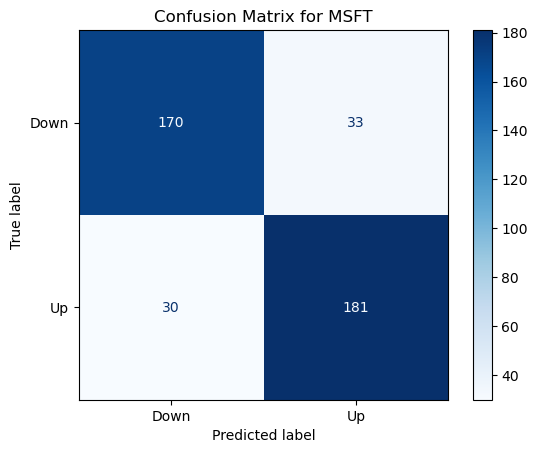

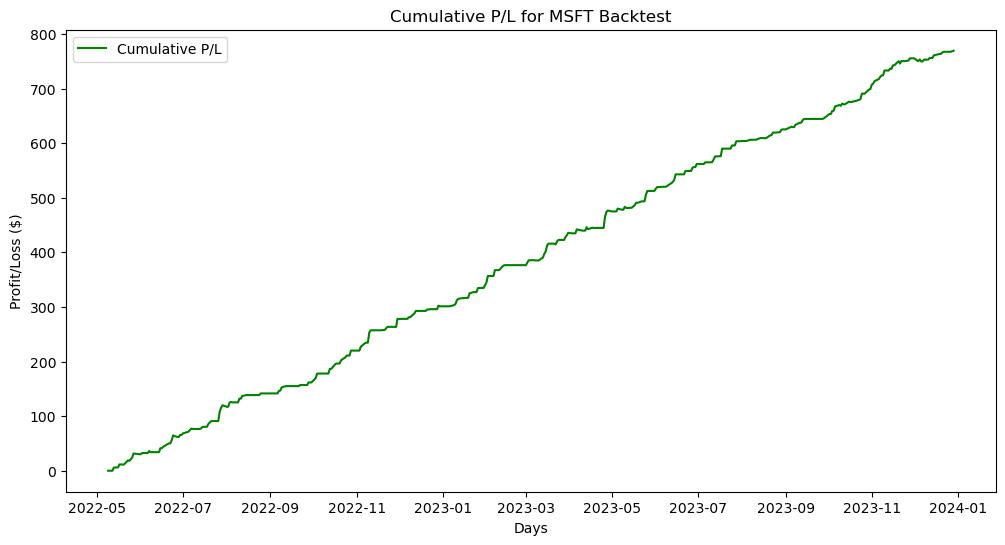

Backtesting Metrics: {'accuracy': 0.8478260869565217, 'precision': 0.8457943925233645, 'recall': 0.8578199052132701, 'f1_score': 0.851764705882353, 'roc_auc': 0.9151238531039152, 'total_pnl': 769.3001251220703, 'avg_daily_pnl': 1.8582128626136964, 'max_drawdown': -5.71002197265625}


In [1]:
import sys
import os

# Get the absolute path to the `src` directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Add the `src` directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from data_processing import fetch_stock_data, calculate_technical_indicators

# Backtesting function
def backtest_xgboost(ticker, start_date='2022-01-01', end_date='2024-01-01', feature_subset=None):
    """
    Backtest a saved XGBoost model on unseen data.

    Args:
    ticker: str, The stock ticker symbol.
    start_date: str, Start date for backtesting data.
    end_date: str, End date for backtesting data.
    feature_subset: list of str, Features used during model training.

    Returns:
    metrics: dict, Performance metrics for the backtested data.
    """
    # Load the saved model
    model_filename = f"xgboost_{ticker}.joblib"
    model = load(model_filename)
    print(f"Loaded model from {model_filename}")
    
    # Fetch and preprocess backtesting data
    data = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    data = calculate_technical_indicators(data)
    data['Price_Change'] = data['Close'].diff()
    data['Target'] = (data['Price_Change'] > 0).astype(int)
    data = data.dropna()  # Remove NaN values

    X_test = data[feature_subset] if feature_subset else data.drop(columns=['Price_Change', 'Target'])
    y_test = data['Target']
    close_prices = data['Close']
    
    # Predict on the backtesting data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Down", "Up"]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {ticker}")
    plt.show()

    positions = y_pred  # 1 for "up" (buy), 0 for "down" (sell)
    price_changes = close_prices.diff().fillna(0)  # Daily price changes
    daily_returns = positions * price_changes  # Profit/loss based on predictions
    cumulative_pnl = np.cumsum(daily_returns)  # Cumulative P/L
    
    # Add P/L to metrics
    metrics['total_pnl'] = cumulative_pnl.iloc[-1]
    metrics['avg_daily_pnl'] = daily_returns.mean()
    metrics['max_drawdown'] = np.min(cumulative_pnl - np.maximum.accumulate(cumulative_pnl))
    
    # Plot cumulative P/L
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_pnl, label='Cumulative P/L', color='green')
    plt.title(f"Cumulative P/L for {ticker} Backtest")
    plt.xlabel('Days')
    plt.ylabel('Profit/Loss ($)')
    plt.legend()
    plt.show()
    
    return metrics

# Example usage
# Define backtesting parameters
ticker = 'MSFT'
start_date = '2022-01-01'
end_date = '2024-01-01'

# Load the best features identified during training
best_features = ['STOCH_fastd', 'PLUS_DM', 'TRANGE', 'HT_TRENDMODE', 'STOCH_fastk', 'ADOSC', 'STOCH_slowd']

# Run the backtest
backtest_metrics = backtest_xgboost(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    feature_subset=best_features
)

# Print the metrics
print("Backtesting Metrics:", backtest_metrics)


[*********************100%***********************]  1 of 1 completed

Loaded model from xgboost_KO.joblib


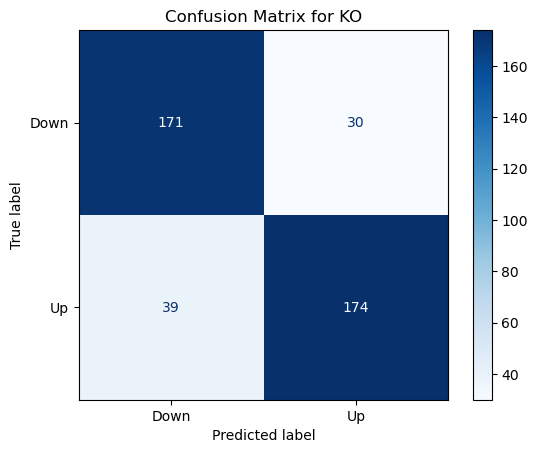

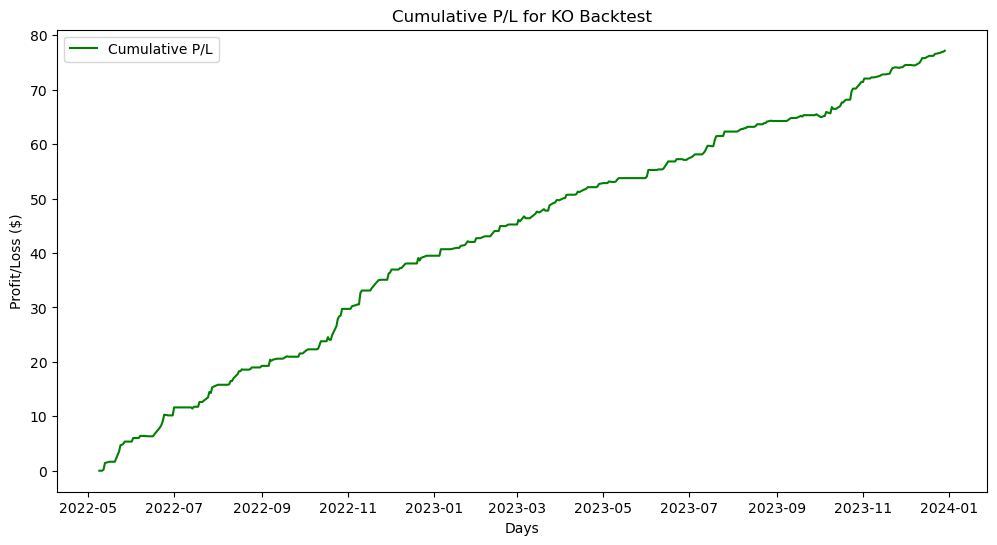

Backtesting Metrics: {'accuracy': 0.8333333333333334, 'precision': 0.8529411764705882, 'recall': 0.8169014084507042, 'f1_score': 0.8345323741007195, 'roc_auc': 0.9228038212692405, 'total_pnl': 77.14997482299805, 'avg_daily_pnl': 0.18635259619081654, 'max_drawdown': -0.5}


In [7]:
import sys
import os

# Get the absolute path to the `src` directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Add the `src` directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from joblib import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from data_processing import fetch_stock_data, calculate_technical_indicators

# Backtesting function
def backtest_xgboost(ticker, start_date='2022-01-01', end_date='2024-01-01', feature_subset=None):
    """
    Backtest a saved XGBoost model on unseen data.

    Args:
    ticker: str, The stock ticker symbol.
    start_date: str, Start date for backtesting data.
    end_date: str, End date for backtesting data.
    feature_subset: list of str, Features used during model training.

    Returns:
    metrics: dict, Performance metrics for the backtested data.
    """
    # Load the saved model
    model_filename = f"xgboost_{ticker}.joblib"
    model = load(model_filename)
    print(f"Loaded model from {model_filename}")
    
    # Fetch and preprocess backtesting data
    data = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    data = calculate_technical_indicators(data)
    data['Price_Change'] = data['Close'].diff()
    data['Target'] = (data['Price_Change'] > 0).astype(int)
    data = data.dropna()  # Remove NaN values

    X_test = data[feature_subset] if feature_subset else data.drop(columns=['Price_Change', 'Target'])
    y_test = data['Target']
    close_prices = data['Close']
    
    # Predict on the backtesting data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Down", "Up"]).plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {ticker}")
    plt.show()

    positions = y_pred  # 1 for "up" (buy), 0 for "down" (sell)
    price_changes = close_prices.diff().fillna(0)  # Daily price changes
    daily_returns = positions * price_changes  # Profit/loss based on predictions
    cumulative_pnl = np.cumsum(daily_returns)  # Cumulative P/L
    
    # Add P/L to metrics
    metrics['total_pnl'] = cumulative_pnl.iloc[-1]
    metrics['avg_daily_pnl'] = daily_returns.mean()
    metrics['max_drawdown'] = np.min(cumulative_pnl - np.maximum.accumulate(cumulative_pnl))
    
    # Plot cumulative P/L
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_pnl, label='Cumulative P/L', color='green')
    plt.title(f"Cumulative P/L for {ticker} Backtest")
    plt.xlabel('Days')
    plt.ylabel('Profit/Loss ($)')
    plt.legend()
    plt.show()
    
    return metrics

# Example usage
# Define backtesting parameters
ticker = 'KO'
start_date = '2022-01-01'
end_date = '2024-01-01'

# Load the best features identified during training
best_features = ['WCLPRICE', 'BB_lower', 'APO', 'MEDPRICE', 'HT_DCPERIOD', 'TYPPRICE', 'TRIMA', 'MACD_hist', 'T3', 'SMA', 'AVGPRICE', 'TRANGE', 'ADXR', 'HT_TRENDMODE', 'STOCH_fastk', 'STOCH_slowk', 'STOCH_slowd', 'TEMA', 'CMO', 'STOCH_fastd', 'HT_DCPHASE', 'AROON_DOWN', 'CCI', 'MFI', 'OBV', 'MACD_signal', 'MINUS_DI', 'HT_LEADSINE', 'HT_PHASOR_inphase', 'WMA']

# Run the backtest
backtest_metrics = backtest_xgboost(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    feature_subset=best_features
)

# Print the metrics
print("Backtesting Metrics:", backtest_metrics)
